<a href="https://colab.research.google.com/github/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/HW2/HW2_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 2: ENSEMBLE LEARNING

Heart disease is one of the top leading cause of death in the world. Most heart diseases are not genetical and they develop through years. Therefore, there is a need to predict potential future patients with heart disease. Exploratory Data Analysis was done in [HW1](https://github.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/HW1/HW1_Logistic_Regression_Implementation.ipynb). The objective is to develop a model able to predict if a particular patient will have heart disease in the future or not based on a limit number of information from the patient. Three different techniques were analyzed to classify the binary data set: Decision Tree Classifier, Random Forest, AdaBoost classifier.



In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import time

In [ ]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
mapping = {'Presence': 1, 'Absence': 0}
df = df.replace({'Heart_Disease': mapping})

y = df['Heart_Disease']
X = df[['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
        'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
        'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']]

m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
#y = y[:,np.newaxis]

In [ ]:
# import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=0.1)
target_names = ['Abscense', 'Presence']

## Implementation of Decision Tree Classifier

Herein a decission tree classifier is implemented using the **DecisionTreeClassifier** built-in package from Scikit Learn. 

In the following codes the effect of the maximum depth criteria to measure the quality of a split is compared and analyzed, finally the best model is chosen. All the models were assessed with cross validation.  

### Effect of Maximum depth for decission tree classifier

Here, 30 decission tree classifier are fitted to the data. The first tree has a max depth equal to 1, while the second tree has a max depth equal to 2, and so on, until the last decission tree with a max depth equal to 30. 

In [ ]:
# Fitting first decission tree classifier 
loop=31
mean_recall = np.zeros(loop-1)
mean_f1 = np.zeros(loop-1)
for maxdepth in np.arange(1,loop,1):
      dtree = DecisionTreeClassifier(criterion='entropy',max_depth=maxdepth)
      #dtree.fit(X_train,y_train)
      #predictions = dtree.predict(X_test)
      #print('Max depth =', dtree.tree_.max_depth)  
      #print('The number of nodes (internal nodes + leaves) in the tree =', dtree.tree_.node_count)  
      #print('confusion matrix= \n',confusion_matrix(y_test, predictions))
      #print(classification_report(y_test, predictions, target_names=target_names))

      # Testing the decission tree classifier with the test set

      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
      n_scores = cross_val_score(dtree, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
      mean_recall[maxdepth-1] = np.mean(n_scores)
      print('Max depth = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))
      n_scores = cross_val_score(dtree, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
      mean_f1[maxdepth-1] = np.mean(n_scores)
      #print(n_scores)
      print('Max depth = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))


Max depth = 1.000 : The average recall score is 0.683 with an associated standard deviation equal to 0.067
Max depth = 1.000 : The average f1 score is 0.690 with an associated standard deviation equal to 0.049
Max depth = 2.000 : The average recall score is 0.584 with an associated standard deviation equal to 0.120
Max depth = 2.000 : The average f1 score is 0.662 with an associated standard deviation equal to 0.069
Max depth = 3.000 : The average recall score is 0.724 with an associated standard deviation equal to 0.118
Max depth = 3.000 : The average f1 score is 0.759 with an associated standard deviation equal to 0.074
Max depth = 4.000 : The average recall score is 0.657 with an associated standard deviation equal to 0.091
Max depth = 4.000 : The average f1 score is 0.723 with an associated standard deviation equal to 0.068
Max depth = 5.000 : The average recall score is 0.714 with an associated standard deviation equal to 0.094
Max depth = 5.000 : The average f1 score is 0.723 wit

The models are validated using k-cross validation with a k equal to 5. Also the models are assessed based on the f1 score and recall metrics. The following figure shows the obtained results. 

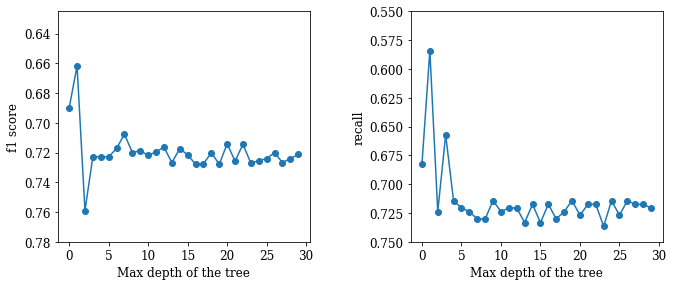

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(mean_f1,'-o')
axes[0].set_xlabel('Max depth of the tree',fontdict)
axes[0].set_ylabel('f1 score',fontdict)
axes[0].set_ylim(0.78, 0.625)

axes[1].plot(mean_recall,'-o')
axes[1].set_xlabel('Max depth of the tree',fontdict)
axes[1].set_ylabel('recall',fontdict)
axes[1].set_ylim(0.75, 0.55)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

Note that the figures have the y axis inversed. For a maximum depth equal to 1 were not optimal the f1 score was close to 0.69. This is a sign that the model may be underfitting the data. The optimal metric values were found at a maximum depth equal to 3 (f1=0.75, recall=0.74). After a maximum depth equal to 3 the f1 metric started to decrease again, suggesting an overfitting issue. With respect to the recall metric, small values are found at maximum depths equal to 1 and 2, suggesting an underfitting case. For max depth equal 3 a relatively large value is found, when the depth is increased, the metric does not increase, it remains close to the value obtained at max depth equal to 3. Therefore, the selected maximum depth value for this particular problem is 3.

### Effect of criterion

Let's see the effect of the function to measure the quality of a split. In the following codes the Gini and entropy criterion are used and the obtained results are compared

In [ ]:
# Using entropy criterion
maxdepth=3
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(dtree, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
mean_recall= np.mean(n_scores)
print('Max depth = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(dtree, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
#print(n_scores)
print('Max depth = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))

Max depth = 3.000 : The average recall score is 0.727 with an associated standard deviation equal to 0.119
Max depth = 3.000 : The average f1 score is 0.759 with an associated standard deviation equal to 0.074


In [ ]:
# Fitting first decission tree classifier
maxdepth=3
dtree = DecisionTreeClassifier(criterion='gini',max_depth=3)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(dtree, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
mean_recall= np.mean(n_scores)
print('Max depth = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(dtree, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
#print(n_scores)
print('Max depth = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))

Max depth = 3.000 : The average recall score is 0.749 with an associated standard deviation equal to 0.115
Max depth = 3.000 : The average f1 score is 0.767 with an associated standard deviation equal to 0.063


Criterion: Entropy --> recall score is 0.73,  f1 score is 0.76
Criterion: Gini --> recall score is 0.75,  f1 score is 0.77

The f1 score obtained with both criteria are practically the same. However, the gini criterion leads to a higher recall score. The recall metric is critical for this type of problem, as it is crucial to ensure that all unhealthy patients receive treatment.

The model with a gini criterion and a max depth equal to 3 is selected.

In [ ]:
model_1 = DecisionTreeClassifier(criterion='gini',max_depth=3)

## Bagging ensemble method

Here the **Random Forest Classifier** method is used. 

### Effect of criterion with Random Forest
The effect of the criterion is analyzed. Two criteria are used: gini and entropy. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(rfc, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

The average recall score is 0.768 with an associated standard deviation equal to 0.079
The average f1 score is 0.809 with an associated standard deviation equal to 0.050


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(rfc, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

The average recall score is 0.768 with an associated standard deviation equal to 0.081
The average f1 score is 0.812 with an associated standard deviation equal to 0.061


Two random forest models were used to classify the data. The first one uses the gini function to measure the quality of a split, while the second one uses the entropy function. The f1 score and recall metrics are used to assess the model performance. The results showed that both criteria leads to the same model performance with a recall and f1 score equal to 0.77 and 0.81, respectively. In this work, the entropy criterion is selected for this model.

### Effect of the number of trees in the forest

In [ ]:
loop=2
j=0
loop = np.geomspace(2,600,20, dtype=int)
lenloop = len(loop)+1
mean_recall = np.zeros(lenloop-1)
mean_f1 = np.zeros(lenloop-1)
for n_estimators in loop:
      rfc = RandomForestClassifier(n_estimators=n_estimators,criterion='entropy')
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
      n_scores = cross_val_score(rfc, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
      mean_recall[j] = np.mean(n_scores)
      print('n_estimators = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (n_estimators, np.mean(n_scores), np.std(n_scores)))
      n_scores = cross_val_score(rfc, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
      mean_f1[j] = np.mean(n_scores)
      print('n_estimators = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (n_estimators, np.mean(n_scores), np.std(n_scores)))
      j = j + 1


n_estimators = 2.000 : The average recall score is 0.594 with an associated standard deviation equal to 0.090
n_estimators = 2.000 : The average f1 score is 0.659 with an associated standard deviation equal to 0.092
n_estimators = 2.000 : The average recall score is 0.546 with an associated standard deviation equal to 0.104
n_estimators = 2.000 : The average f1 score is 0.639 with an associated standard deviation equal to 0.056
n_estimators = 3.000 : The average recall score is 0.746 with an associated standard deviation equal to 0.107
n_estimators = 3.000 : The average f1 score is 0.744 with an associated standard deviation equal to 0.073
n_estimators = 4.000 : The average recall score is 0.632 with an associated standard deviation equal to 0.068
n_estimators = 4.000 : The average f1 score is 0.710 with an associated standard deviation equal to 0.059
n_estimators = 6.000 : The average recall score is 0.670 with an associated standard deviation equal to 0.098
n_estimators = 6.000 : The

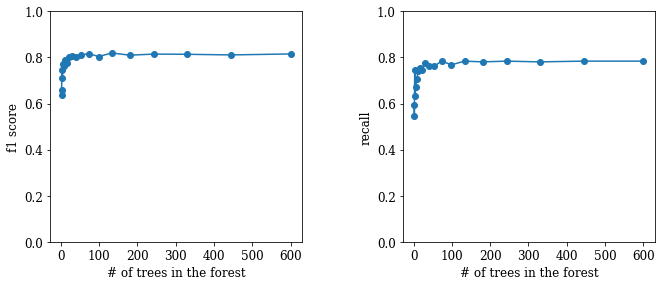

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(loop, mean_f1,'-o')
axes[0].set_xlabel('# of trees in the forest',fontdict)
axes[0].set_ylabel('f1 score',fontdict)
axes[0].set_ylim(0, 1)

axes[1].plot(loop, mean_recall,'-o')
axes[1].set_xlabel('# of trees in the forest',fontdict)
axes[1].set_ylabel('recall',fontdict)
axes[1].set_ylim(0, 1)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

The previous figures show the effect of the number of trees in the forest on the model performance. For a number of trees equal to 2 the recall an f1 score are equal to 0.594 and 0.659, respectively. As the number of trees increases the metrics increases. After a number of trees equal to 100 the metrics do not increase more and rather remain fairly constant with a recall equal to 0.78 and a f1 score is 0.82. Therefore, a number of trees equal to 100 is choosen. 

In [ ]:
model_2 = RandomForestClassifier(n_estimators=100,criterion='entropy')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_2, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(model_2, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

The average recall score is 0.775 with an associated standard deviation equal to 0.077
The average f1 score is 0.819 with an associated standard deviation equal to 0.064


## Boosting ensemble method

Here the **AdaBoostClassifier** method is implemented. 



### Effect of the criterion to assess split with AdaBoostClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=1)
clf = AdaBoostClassifier(base_estimator=dtree,n_estimators=n_estimators, learning_rate=learning_rate, random_state=0, algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(rfc, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

The average recall score is 0.775 with an associated standard deviation equal to 0.084
The average f1 score is 0.813 with an associated standard deviation equal to 0.054


In [ ]:
from sklearn.ensemble import RandomForestClassifier
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
clf = AdaBoostClassifier(base_estimator=dtree,n_estimators=n_estimators, learning_rate=learning_rate, random_state=0, algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

The average recall score is 0.683 with an associated standard deviation equal to 0.067
The average f1 score is 0.690 with an associated standard deviation equal to 0.049


Two AdaBoostClassifier models were used to classify the data. The first one uses the gini function to measure the quality of a split, while the second one uses the entropy function. The f1 score and recall metrics are used to assess the model performance. The results showed that using the gini criterion for this particular problem improved significantly the results. the recall and f1 score obtained with the gini criterion was 0.78 and 0.81, respectively. While, the metrics obtained with the entropy criterion was 0.68 and 0.69, respectively. The gini criterion is selected for this model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dtree = DecisionTreeClassifier(criterion='gini')
clf = AdaBoostClassifier(base_estimator=dtree,n_estimators=n_estimators, learning_rate=learning_rate, random_state=0, algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

The average recall score is 0.714 with an associated standard deviation equal to 0.072
The average f1 score is 0.719 with an associated standard deviation equal to 0.057


### Effect of the The maximum number of estimators at which boosting is terminated

In [ ]:
loop=2
j=0
loop = np.geomspace(2,600,20, dtype=int)
lenloop = len(loop)+1
mean_recall = np.zeros(lenloop-1)
mean_f1 = np.zeros(lenloop-1)
for n_estimators in loop:
      clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=0, algorithm='SAMME')
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
      n_scores = cross_val_score(clf, X_train, y_train, scoring='recall',  cv=cv, n_jobs=-1, error_score='raise')
      mean_recall[j] = np.mean(n_scores)
      print('n_estimators = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (n_estimators, np.mean(n_scores), np.std(n_scores)))
      n_scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
      mean_f1[j] = np.mean(n_scores)
      print('n_estimators = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (n_estimators, np.mean(n_scores), np.std(n_scores)))
      j = j + 1


n_estimators = 2.000 : The average recall score is 0.308 with an associated standard deviation equal to 0.085
n_estimators = 2.000 : The average f1 score is 0.263 with an associated standard deviation equal to 0.065
n_estimators = 2.000 : The average recall score is 0.308 with an associated standard deviation equal to 0.085
n_estimators = 2.000 : The average f1 score is 0.263 with an associated standard deviation equal to 0.065
n_estimators = 3.000 : The average recall score is 0.692 with an associated standard deviation equal to 0.085
n_estimators = 3.000 : The average f1 score is 0.693 with an associated standard deviation equal to 0.056
n_estimators = 4.000 : The average recall score is 0.308 with an associated standard deviation equal to 0.085
n_estimators = 4.000 : The average f1 score is 0.263 with an associated standard deviation equal to 0.065
n_estimators = 6.000 : The average recall score is 0.692 with an associated standard deviation equal to 0.085
n_estimators = 6.000 : The

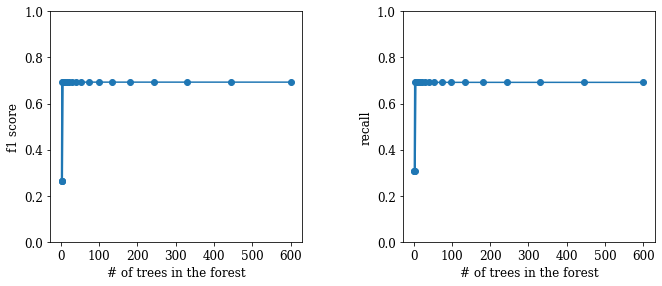

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(loop, mean_f1,'-o')
axes[0].set_xlabel('# of trees in the forest',fontdict)
axes[0].set_ylabel('f1 score',fontdict)
axes[0].set_ylim(0, 1)

axes[1].plot(loop, mean_recall,'-o')
axes[1].set_xlabel('# of trees in the forest',fontdict)
axes[1].set_ylabel('recall',fontdict)
axes[1].set_ylim(0, 1)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

The metrics show that for a maximum number of estimators equal to 2 the model performance is poor. However, the performance increase rapidly with the max number of estimators. For a max num of estimators equal to 4 the metrics reached a peak and after that increases in the # of estimators do not improved the model. Here a max number of estimators equal to 4 is chosen. A recall equal to 0.69 and f1 score equal to 0.69 are obtained.

### Effect of learning rate for AdaBoostClassifier
The effect of the learning rate of the model is assessed in this particular problem. 22 models with learning rates starting from 0 to 5 were fitted to the data. The performance of each model is assessed through the f1 and recall score.

In [ ]:
loop=2
j=0
loop = np.arange(0.1,5.1,0.25)
lenloop = len(loop)+1
mean_recall = np.zeros(lenloop-1)
mean_f1 = np.zeros(lenloop-1)
for learning_rate in loop:
      clf = AdaBoostClassifier(n_estimators=4, learning_rate=learning_rate, random_state=0, algorithm='SAMME')
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
      n_scores = cross_val_score(clf, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
      mean_recall[j] = np.mean(n_scores)
      print('Learning rate = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (learning_rate, np.mean(n_scores), np.std(n_scores)))
      n_scores = cross_val_score(clf, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
      mean_f1[j] = np.mean(n_scores)
      #print(n_scores)
      print('Learning rate = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (learning_rate, np.mean(n_scores), np.std(n_scores)))
      j = j + 1


Learning rate = 0.100 : The average recall score is 0.702 with an associated standard deviation equal to 0.098
Learning rate = 0.100 : The average f1 score is 0.706 with an associated standard deviation equal to 0.076
Learning rate = 0.350 : The average recall score is 0.778 with an associated standard deviation equal to 0.083
Learning rate = 0.350 : The average f1 score is 0.801 with an associated standard deviation equal to 0.084
Learning rate = 0.600 : The average recall score is 0.816 with an associated standard deviation equal to 0.055
Learning rate = 0.600 : The average f1 score is 0.836 with an associated standard deviation equal to 0.049
Learning rate = 0.850 : The average recall score is 0.816 with an associated standard deviation equal to 0.055
Learning rate = 0.850 : The average f1 score is 0.836 with an associated standard deviation equal to 0.049
Learning rate = 1.100 : The average recall score is 0.797 with an associated standard deviation equal to 0.096
Learning rate = 1

In the following code, the results will be plotted. 

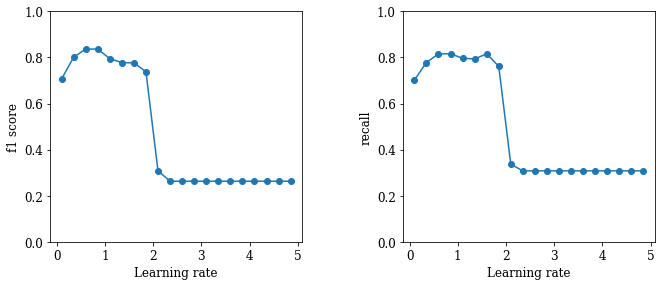

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(loop, mean_f1,'-o')
axes[0].set_xlabel('Learning rate',fontdict)
axes[0].set_ylabel('f1 score',fontdict)
axes[0].set_ylim(0, 1)

axes[1].plot(loop, mean_recall,'-o')
axes[1].set_xlabel('Learning rate',fontdict)
axes[1].set_ylabel('recall',fontdict)
axes[1].set_ylim(0, 1)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

The metrics for a learning rate equal to 0.1 are around 0.7, as the learning rate started increasing the scores increased as well. However, for learning rates larger than 2, the metrics decreased significantly. A learning rate equal to 1 is determined as the optimal parameter for this work. The f1 score and recall metric obtained with a learning parameter equal to 1 are both 0.81.



In [ ]:
model_3 = AdaBoostClassifier(n_estimators=4, learning_rate=1, random_state=0, algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_3, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('Learning rate = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (learning_rate, np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(model_3, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
print('Learning rate = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (learning_rate, np.mean(n_scores), np.std(n_scores)))

Learning rate = 4.850 : The average recall score is 0.810 with an associated standard deviation equal to 0.070
Learning rate = 4.850 : The average f1 score is 0.813 with an associated standard deviation equal to 0.064


The results obtained with the AdaBoostClassifier algorithm are equal to 0.81 for both metric recall and f1-score.

## Comments on the difference/ similarity of the results

* The effect of the critera to assess a split lead to different results. While the Random Forest performanced better with the entropy criteria, the AdaBoost Classifier works bette with the gini function. 

* The required number of trees to get the best results for the Random Forest algorithm is around 100 trees, while for the AdaBoost algorithm the required number of trees is just 4. 

* The best results obtained with the Random Forest algorithm are: recall = 0.78 and f1-score = 0.82. While for the case of AdaBoost the metrics are recall = 0.81 and f1-score = 0.81. Both algorithms lead to similar results. There is a slightly difference in the recall metric, having the AdaBoost a slightly better performance in this metric. 

## Comparisons and Conclusions

Heart disease is one of the top leading cause of death in the world. Most heart diseases are not genetical and they develop through years. Therefore, there is a need to predict potential future patients with heart disease. The objective is to develop a model able to predict if a particular patient will have heart disease in the future or not based on a limit number of information from the patient. Three different techniques were analyzed to classify the binary data set: Decision Tree Classifier, Random Forest, AdaBoost classifier. 

### Metrics and their importance and impact

The model were assessed with two metrics, recall and f1-score. The recall metric was selected due to the nature of the problem. The recall metric can be explained as the metric to answer the following question, within everything that actually is positive, how many did the model suceed to find?. It is crucial that all patients who actually have heart disease receive a more robust medical test to confirm the disease, even if it means that some healthy patients are given this additional test. Therefore, the recall metric is used to assess the achieved models. However, the cost of this exam is high and there is a need to minimize the unnecessary exams. Therefore, the f1-score is used. The f1 score is the harmonic mean of precision and recall. 

The criteria to select different metrics is important, in this particular problem the weight given to the recall metric is higher with respect to the f1-score appreciation. This criteria impacted the choice of the Decission Tree Classifier model. For this case the model with a gini function to measure the quality of a split was used over the entropy function because using the gini function lead to a higher recall score (0.75), while the f1-score for both is practically equal. If the recall metric had been ignored in this work, the entropy function may had been selected.

### Model Comparison

Three different techniques were analyzed to classify the binary data set: Decision Tree Classifier, Random Forest, AdaBoost classifier. The hyperparameters were tunned for each model and the recall and f1-score metrics are used to assess their performance. The models were validated using k-cross validation with k = 5. The summary of the results are shown below:

Decision Tree Classifier: recall score = 0.75, f1-score = 0.77

Random Forest: recall score = 0.78, f1-score = 0.82

AdaBoostClassifier: recall score = 0.81, f1-score = 0.81

It is clear that the Random Forest and AdaBoostClassifier outperform the basic Decision Tree Classifier. This is expected since the Decision Tree Classifier is a single tree and do not learn from its misclassifications. On the other hand, the Random Forest and AdaBoost are more robust algorithms. There is a difference of 0.01 (1%) between the two models for the f1 score, the Random Forest has the larger f1-score. However the AdaBoost model obtained the largest recall metric (0.81) while the Random Forest obtained a value equal to 0.78, a difference of 0.03 (3%). Based on the nature of the current problem, priority is placed on the recall metric and the AdaBoost Classifier should be chosen. 

Until now, the models has been improved using the training data which has been cross-validated with the k-fold cross validation. However, a proper assesment of the performance of the model should be based on data that the models have never used in the training process. In the following codes, the three models will be assessed based on completely new data and a final model choice is made. 

In [ ]:
def f1_score(y_act,y_model):
    
  tp = sum((y_act==1) & (y_model==1))
  tn = sum((y_act==0) & (y_model==0))
  fn = sum((y_act==1) & (y_model==0))
  fp = sum((y_act==0) & (y_model==1))
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = 2*(precision*recall)/(precision+recall)
  return recall, f1

In [ ]:
model_1.fit(X_train,y_train)
y_pred_1 = model_1.predict(X_test)
print('DecesionTreeClassifier recall and f1-score, respectively: %.2f %.2f ' % (f1_score(y_test, y_pred_1)))

model_2.fit(X_train,y_train)
y_pred_2 = model_2.predict(X_test)
print('Random Forest recall and f1-score, respectively: %.2f %.2f ' % (f1_score(y_test, y_pred_2)))

model_3.fit(X_train,y_train)
y_pred_3 = model_3.predict(X_test)
print('AdaBoost recall and f1-score, respectively: %.2f %.2f ' % (f1_score(y_test, y_pred_3)))

DecesionTreeClassifier recall and f1-score, respectively: 0.67 0.69 
Random Forest recall and f1-score, respectively: 0.73 0.73 
AdaBoost recall and f1-score, respectively: 0.67 0.69 


The performance of the models with new data is shown above. The Decision Tree Classifier and the AdaBoost models obtained the same metric values for both recall and f1-score, 0.67 and 0.69, respectivelty. While the Random Forest method obtained a relatively better performance with a value of 0.73 for both metrics (recall and f1-score).

The AdaBoost model performed slightly better (3% difference) for the recall metric when cross-validation was used with respect to the Random Forest. Note, however that those metrics can be biased since the hyperparameters tuning was based using the training data. When new data is used to assess the models performance, the Random Forest model outperform the Adaboost model by 6% for the recall metric.

Based on this results the obtained Random Forest model is chosen to be the best model option (among the models analyzed) for the current problem. 